# Clustering Music Genres

<img src="images/music.jpg">

Clustering is a machine learning technique to group data points characterized by specific features. Clustering music genres is a task of grouping music based on the similarities in their audio characteristics. If you want to learn how to perform clustering analysis on music genres, this project is for you. In this project, I will take you through the task of clustering music genres with machine learning using Python.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn import cluster

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [58]:
df = pd.read_csv("data/Spotify-2000.csv")

In [59]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [60]:
df = df.drop("Index", axis=1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
for i in df.columns:
    MinMaxScaler(i)

In [62]:
x = df[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]]

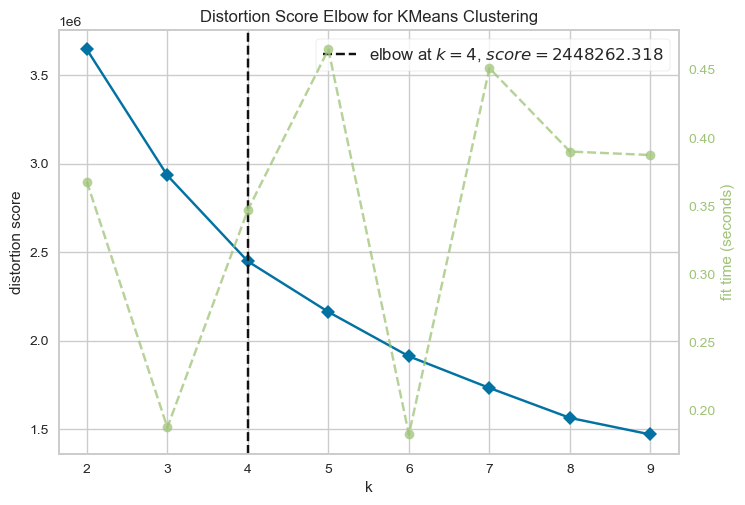

In [63]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [64]:
model = KMeans(n_clusters=4, random_state=42)

In [65]:
model = model.fit_predict(x)

In [66]:
df["Music Segments"] = model
MinMaxScaler(df["Music Segments"])
df["Music Segments"] = df["Music Segments"].map({0:"Cluster 1" ,1: "Cluster 2", 2: 
    "Cluster 3", 3: "Cluster 4"})

In [67]:
# pip install -U kaleido

In [68]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Music Segments"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = df[df["Music Segments"] == i]['Energy'],
                                z = df[df["Music Segments"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

PLOT.show()

<img src="images/1.png">

## Summary

So this is how you can perform cluster analysis of music genres with machine learning using Python. Clustering music genres is a task of grouping music based on the similarities in their audio features. I hope you liked this article on clustering music genres with machine learning. 